In [1]:
import seaborn as sn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
# Read Data 
data = pd.read_csv("/home/ravitha/Desktop/Health Analytics/breast-cancer-wisconsin-data/data.csv")
#print(data.head())


In [5]:
# Identify the number of features
col= data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
# Identify the number of rows
print(len(data))

list = ['diagnosis', 'id', 'Unnamed: 32']
feat = data.drop(list,axis = 1)
print(len(feat.columns))

569
30


Benign 357 0.6274165202108963
Malignant 212 0.37258347978910367


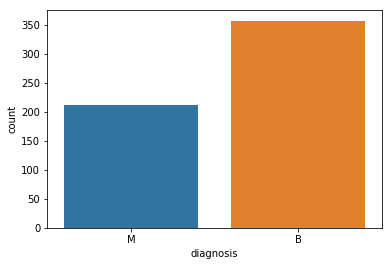

In [7]:
ax = sn.countplot(data.diagnosis, label='count')
B, M = data.diagnosis.value_counts()
print('Benign', B, B/len(data))
print('Malignant', M, M/len(data))
plt.show()

In [8]:
print(feat.describe())


       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [9]:
feat_standardized = (feat - feat.mean()) / (feat.std())

In [15]:
label = data.diagnosis
#print(label)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

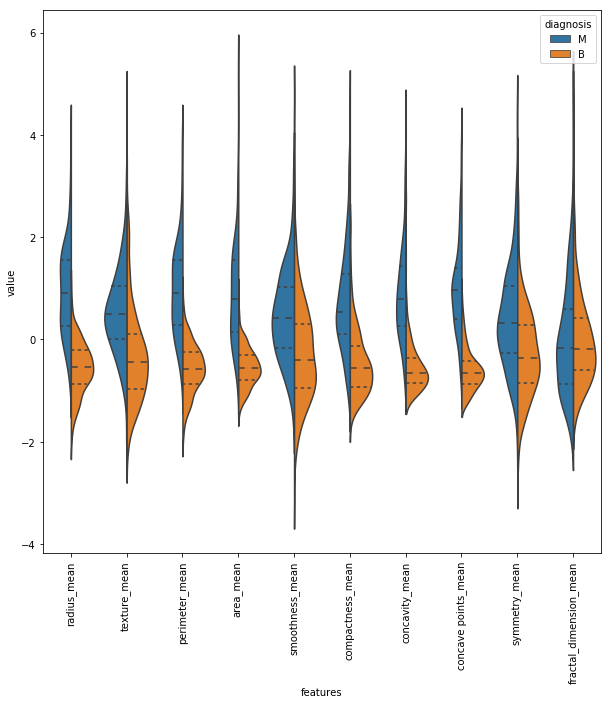

In [24]:
data_plot = pd.concat([label, feat_standardized.iloc[:,0:10]],axis = 1)
data_plot = pd.melt(data_plot , id_vars= 'diagnosis', var_name='features', value_name = 'value')

#print(data_plot)

plt.figure(figsize=(10,10))
sn.violinplot(x = 'features', y='value', hue='diagnosis', data=data_plot, split=True, inner='quart')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

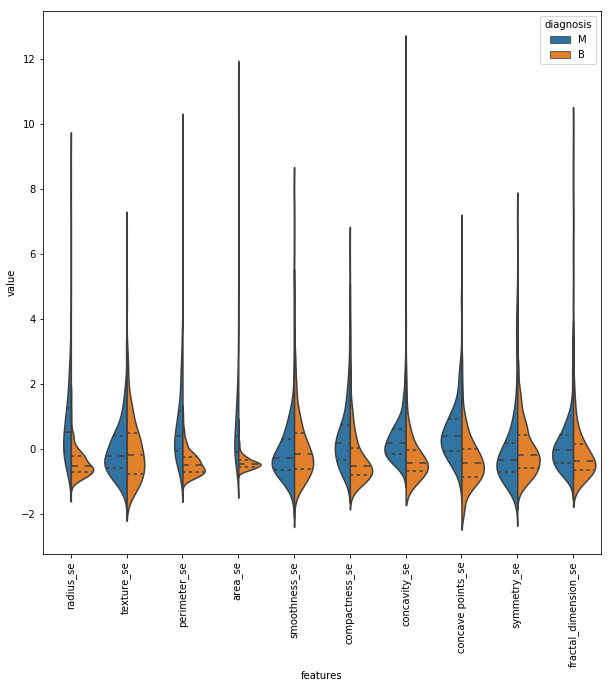

In [25]:
data_plot = pd.concat([label, feat_standardized.iloc[:,10:20]],axis = 1)
data_plot = pd.melt(data_plot , id_vars= 'diagnosis', var_name='features', value_name = 'value')

#print(data_plot)

plt.figure(figsize=(10,10))
sn.violinplot(x = 'features', y='value', hue='diagnosis', data=data_plot, split=True, inner='quart')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

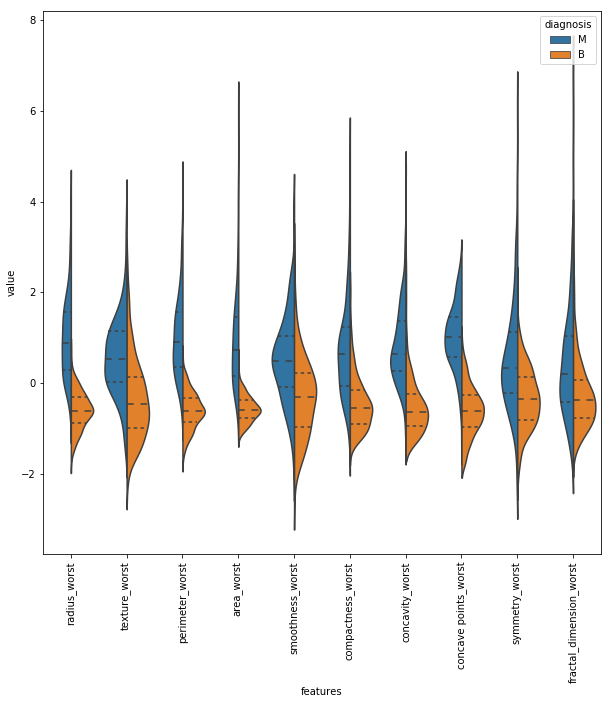

In [26]:
data_plot = pd.concat([label, feat_standardized.iloc[:,20:31]],axis = 1)
data_plot = pd.melt(data_plot , id_vars= 'diagnosis', var_name='features', value_name = 'value')

#print(data_plot)

plt.figure(figsize=(10,10))
sn.violinplot(x = 'features', y='value', hue='diagnosis', data=data_plot, split=True, inner='quart')
plt.xticks(rotation = 90)

/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


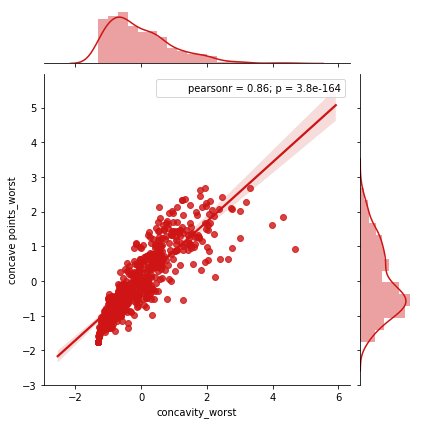

In [33]:
# Use Joint plot to find the correlation between features. If two features are highly correlated, then it is a
# common practice to drop one of them
import scipy.stats as stats
j = sn.jointplot(feat_standardized.loc[:,'concavity_worst'], feat_standardized.loc[:,'concave points_worst'], kind="reg", color="#ce1414")
j.annotate(stats.pearsonr)
plt.show()

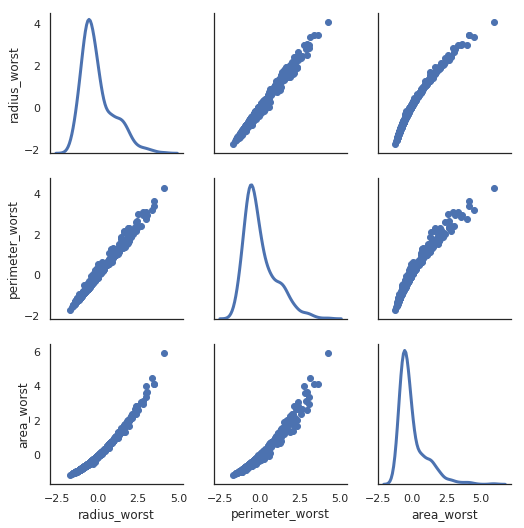

In [41]:
# Pair Grid plot can be used for comparison of more than two features

sn.set(style="white")
df = feat_standardized.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sn.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sn.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

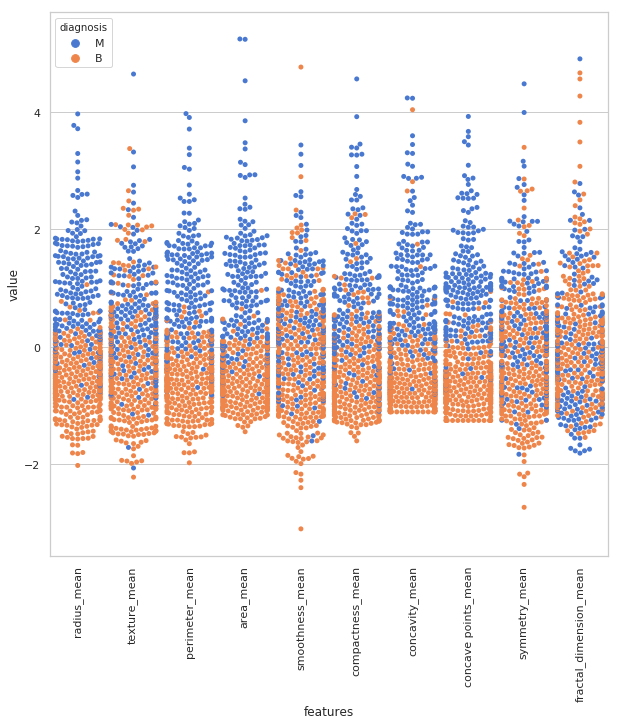

In [44]:
# Swarm Plot


sn.set(style="whitegrid", palette="muted")
data_plot = pd.concat([label, feat_standardized.iloc[:,0:10]],axis = 1)
data_plot = pd.melt(data_plot , id_vars= 'diagnosis', var_name='features', value_name = 'value')

#print(data_plot)

plt.figure(figsize=(10,10))
sn.swarmplot(x = 'features', y='value', hue='diagnosis', data=data_plot)
plt.xticks(rotation = 90)

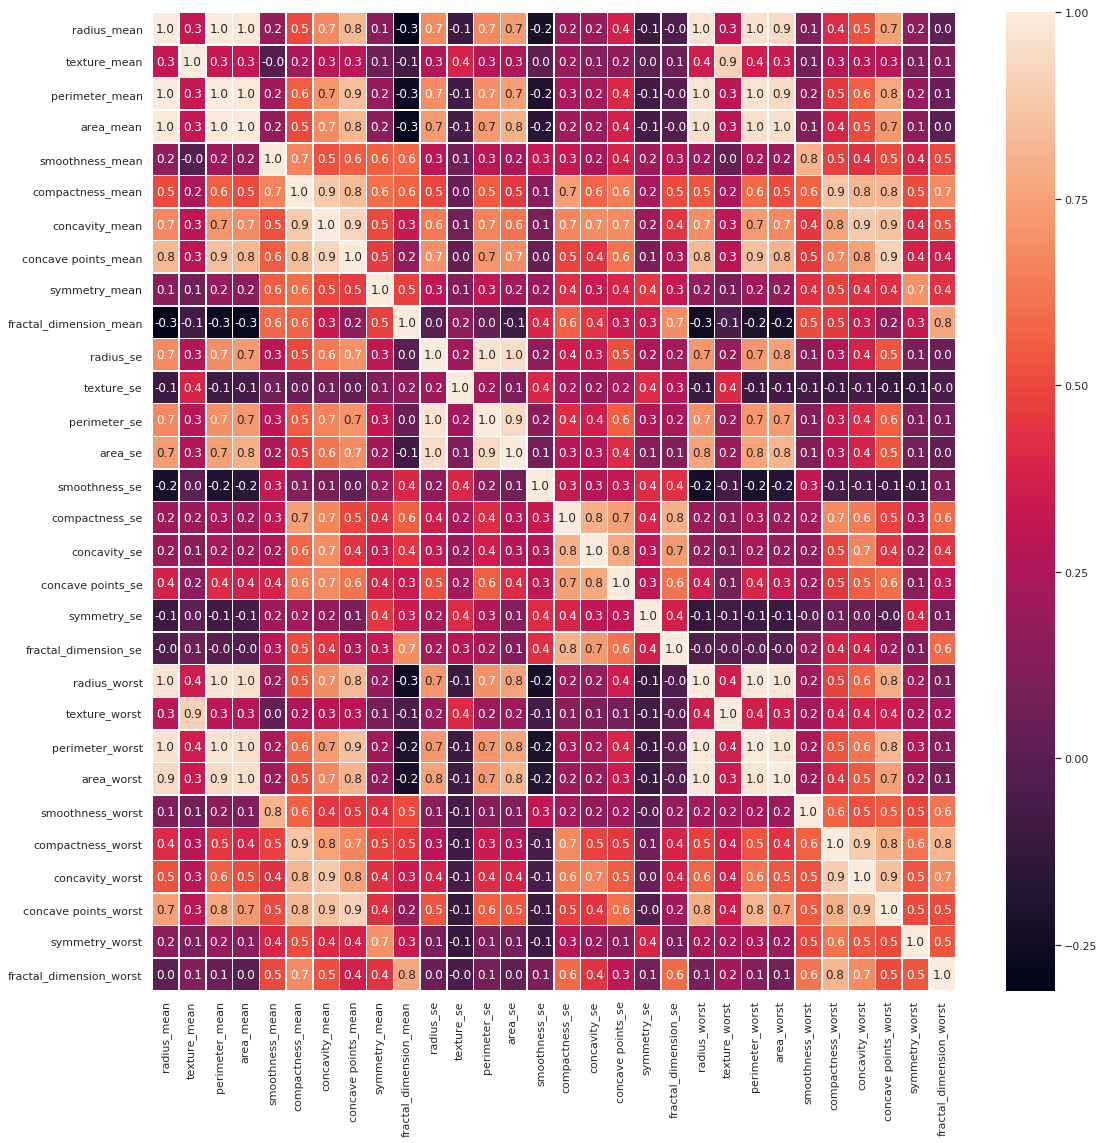

In [45]:
# Heat map displays correlation between all features
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(feat_standardized.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


Compactness_mean, concavity_mean and concave points_mean are correlated with each other.
choose concavity_mean

radius_se, perimeter_se and area_se are correlated
use area_se

radius_worst, perimeter_worst and area_worst are correlated
use area_worst. 

Compactness_worst, concavity_worst and concave points_worst
use concavity_worst

Compactness_se, concavity_se and concave points_se 
use concavity_se. 

texture_mean and texture_worst are correlated 
texture_mean. 

area_worst and area_mean are correlated
use area_mean.

## Feature Selection based on Correlation and Random Forest Classification

In [46]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
feat1 = feat_standardized.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
feat1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.071512,0.983510,1.567087,2.650542,2.215566,2.253764,-0.564768,2.485391,-0.213814,0.723390,1.147747,0.906286,1.306537,2.107672,2.748204,1.935312
1,-0.353322,1.907030,-0.826235,-0.023825,0.001391,-0.867889,-0.875473,0.741749,-0.604819,-0.440393,-0.804742,-0.099356,-0.375282,-0.146620,-0.243675,0.280943
2,0.455786,1.557513,0.941382,1.362280,0.938859,-0.397658,-0.779398,1.180298,-0.296744,0.212889,0.236827,0.293301,0.526944,0.854222,1.151242,0.201214
3,0.253509,-0.763792,3.280667,1.914213,2.864862,4.906602,-0.110312,-0.288125,0.689095,0.818798,4.728520,2.045711,3.391291,1.987839,6.040726,4.930672
4,-1.150804,1.824624,0.280125,1.369806,-0.009552,-0.561956,-0.789549,1.189310,1.481763,0.827742,-0.360775,0.498889,0.220362,0.612640,-0.867590,-0.396751


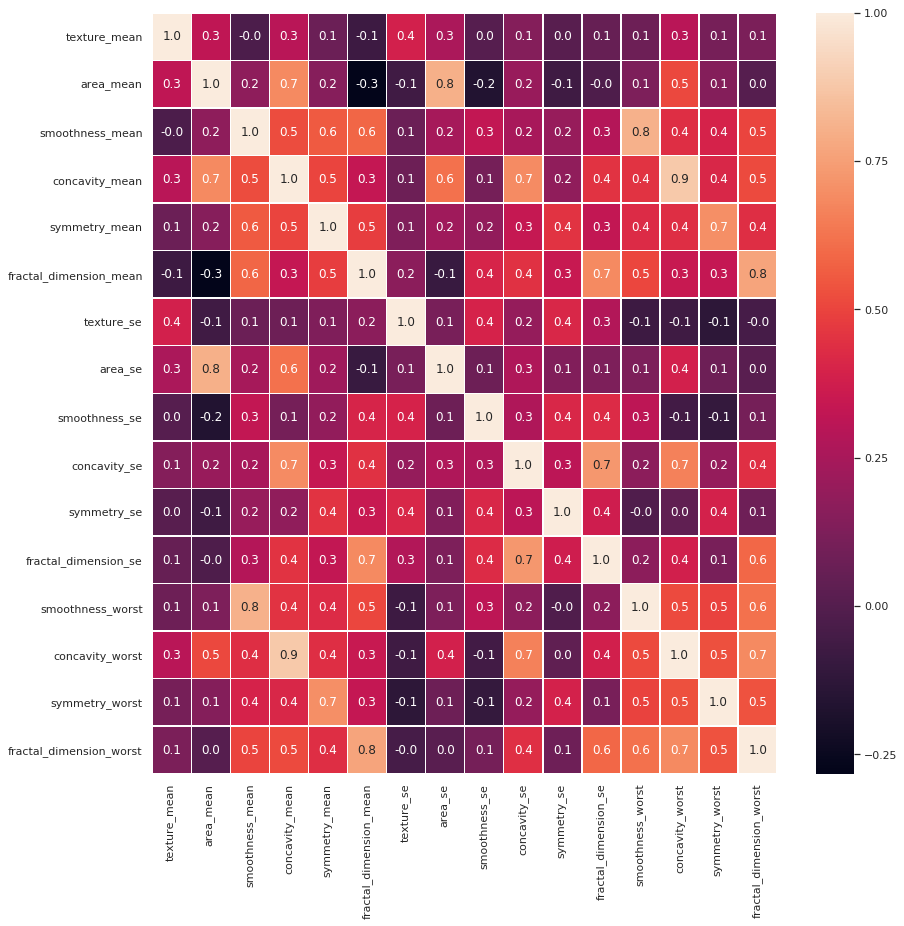

In [47]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sn.heatmap(feat1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9532163742690059


/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


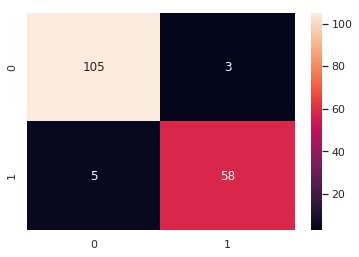

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(feat1, label, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sn.heatmap(cm,annot=True,fmt="d")


## Univariate Feature Selection

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
x_train, x_test, y_train, y_test = train_test_split(feat, label, test_size=0.3, random_state=42)
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [57]:

score = select_feature.scores_.sort()
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)



Score list: [3.42575072e-04 1.32470372e-03 1.39557806e-03 2.65927071e-03
 4.07131026e-02 1.00015175e-01 1.23087347e-01 1.95982847e-01
 2.01587194e-01 2.63226314e-01 3.74071521e-01 6.92896719e-01
 1.00635138e+00 3.41839493e+00 7.09766457e+00 8.90751003e+00
 1.19077581e+01 1.30547650e+01 2.45882967e+01 2.58858117e+01
 6.06916433e+01 1.16958562e+02 1.72696840e+02 1.77946492e+02
 3.25782599e+02 1.34061092e+03 2.40512835e+03 6.12741067e+03
 3.66899557e+04 7.50217341e+04]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c